In [1]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from time import sleep
import getpass

In [2]:
my_user = "username of twitter"
# my_pass = getpass.getpass()
my_pass = "pass of twitter"

In [3]:
search_item = "india"

In [5]:
PATH = r"C:\Program Files\drivers\chromedriver_103.exe"
chrome_option = webdriver.ChromeOptions()
chrome_option.executable_path = PATH
driver = webdriver.Chrome(chrome_option)
driver.get("https://twitter.com/i/flow/login")
sleep(3)

In [6]:
user_id = driver.find_element(By.XPATH,"//input[@type='text']")
user_id.send_keys(my_user)
user_id.send_keys(Keys.ENTER)

In [13]:
my_pass = "pass of twitter"
password = driver.find_element(By.XPATH,"//input[@type='password']")
password.send_keys(my_pass)
password.send_keys(Keys.ENTER)

In [14]:
search_item = "india"
search_box = driver.find_element(By.XPATH,"//input[@data-testid='SearchBox_Search_Input']")
search_box.send_keys(search_item)
search_box.send_keys(Keys.ENTER)

In [15]:
all_tweets = set()


tweets = driver.find_elements(By.XPATH,"//div[@data-testid='tweetText']")
while True:
    for tweet in tweets:
        all_tweets.add(tweet.text)
    driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
    sleep(3)
    tweets = driver.find_elements(By.XPATH,"//div[@data-testid='tweetText']")
    if len(all_tweets)>50:
        break

In [16]:
all_tweets = list(all_tweets)
all_tweets[0]

'HUGE - Former Indian cricketer Laxman Sivaramakrishnan slams Rajdeep Sardesai\n\nRajdeep : "Why use Jai Shri Ram as an aggressive chant to mock Pakistani players?"\n\nLaxman : "What abuses I have got as a 16-year-old in Pakistan, only I know. From my colour to my religion to my…'

In [17]:
import pandas as pd
pd.options.display.max_colwidth = 1000
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [18]:
stp_words = stopwords.words('english')
print(stp_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [19]:
all_tweets = list(all_tweets)
all_tweets[0]

'HUGE - Former Indian cricketer Laxman Sivaramakrishnan slams Rajdeep Sardesai\n\nRajdeep : "Why use Jai Shri Ram as an aggressive chant to mock Pakistani players?"\n\nLaxman : "What abuses I have got as a 16-year-old in Pakistan, only I know. From my colour to my religion to my…'

In [20]:
df = pd.DataFrame(all_tweets,columns=['tweets'])
df.head()

,tweets
0,"HUGE - Former Indian cricketer Laxman Sivaramakrishnan slams Rajdeep Sardesai\n\nRajdeep : ""Why use Jai Shri Ram as an aggressive chant to mock Pakistani players?""\n\nLaxman : ""What abuses I have got as a 16-year-old in Pakistan, only I know. From my colour to my religion to my…"
1,"Massive protests happening in Karachi, Pakistan against Israel and in support of Hamas, demanding either free Palestine or send them to Gaza frontlines"
2,"Via SM \n\n""Afghanistan, an all-MusIim team, is playing England today. The Indian crowd is cheering for them, as we always do. Afghanistan even has their home ground in India, not in Pakistan.\n\nWe don't have problems with MusIim players or MusIim-only teams. We have a problem with…"
3,Massive gathering in Pakistan showing solidarity with #Gaza
4,"Breaking Dear world, the people of Pakistan are standing in solidarity with their Palestinian brothers and sisters, protesting against the oppression they face.\n\n #GazzeUnderAttack #PalestineLivesMatter #Palestine #Isreal #طوفان_الاقصى_"


In [21]:
one_tweet=df.iloc[4]['tweets']
one_tweet

' Breaking Dear world, the people of Pakistan are standing in solidarity with their Palestinian brothers and sisters, protesting against the oppression they face.\n\n #GazzeUnderAttack #PalestineLivesMatter #Palestine #Isreal #طوفان_الاقصى_'

In [24]:
from textblob import TextBlob
from wordcloud import WordCloud

def TweetCleaning(tweet):
    cleanTweet = re.sub(r"@[a-zA-Z0-9]+","",tweet)
    cleanTweet = re.sub(r"#[a-zA-Z0-9\s]+","",cleanTweet)
    cleanTweet = ' '.join(word for word in cleanTweet.split() if word not in stp_words)
    return cleanTweet

def calPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

def calSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def segmentation(tweet):
    if tweet > 0:
        return "positive"
    if tweet == 0:
        return "neutral"
    else:
        return "negative"

In [25]:
df['cleanedTweets'] = df['tweets'].apply(TweetCleaning)
df['tPolarity'] = df['cleanedTweets'].apply(calPolarity)
df['tSubjectivity'] = df['cleanedTweets'].apply(calSubjectivity)
df['segmentation'] = df['tPolarity'].apply(segmentation)
df.head()

,tweets,cleanedTweets,tPolarity,tSubjectivity,segmentation
0,"HUGE - Former Indian cricketer Laxman Sivaramakrishnan slams Rajdeep Sardesai\n\nRajdeep : ""Why use Jai Shri Ram as an aggressive chant to mock Pakistani players?""\n\nLaxman : ""What abuses I have got as a 16-year-old in Pakistan, only I know. From my colour to my religion to my…","HUGE - Former Indian cricketer Laxman Sivaramakrishnan slams Rajdeep Sardesai Rajdeep : ""Why use Jai Shri Ram aggressive chant mock Pakistani players?"" Laxman : ""What abuses I got 16-year-old Pakistan, I know. From colour religion my…",0.2,0.45,positive
1,"Massive protests happening in Karachi, Pakistan against Israel and in support of Hamas, demanding either free Palestine or send them to Gaza frontlines","Massive protests happening Karachi, Pakistan Israel support Hamas, demanding either free Palestine send Gaza frontlines",0.2,0.90,positive
2,"Via SM \n\n""Afghanistan, an all-MusIim team, is playing England today. The Indian crowd is cheering for them, as we always do. Afghanistan even has their home ground in India, not in Pakistan.\n\nWe don't have problems with MusIim players or MusIim-only teams. We have a problem with…","Via SM ""Afghanistan, all-MusIim team, playing England today. The Indian crowd cheering them, always do. Afghanistan even home ground India, Pakistan. We problems MusIim players MusIim-only teams. We problem with…",0.0,0.00,neutral
3,Massive gathering in Pakistan showing solidarity with #Gaza,Massive gathering Pakistan showing solidarity,0.0,1.00,neutral
4,"Breaking Dear world, the people of Pakistan are standing in solidarity with their Palestinian brothers and sisters, protesting against the oppression they face.\n\n #GazzeUnderAttack #PalestineLivesMatter #Palestine #Isreal #طوفان_الاقصى_","Breaking Dear world, people Pakistan standing solidarity Palestinian brothers sisters, protesting oppression face. #طوفان_الاقصى_",0.0,0.00,neutral


In [26]:
df.pivot_table(index=['segmentation'],aggfunc={'segmentation':'count'})

,segmentation
segmentation,
negative,3
neutral,33
positive,21


In [27]:
df.sort_values(by=['tPolarity'],ascending=False).head(3)

,tweets,cleanedTweets,tPolarity,tSubjectivity,segmentation
8,"A very good Morning from Lahore, Pakistan<3","A good Morning Lahore, Pakistan<3",0.700000,0.600000,positive
24,"Rahsid Khan, a muslim player of an Islamic Country Afghanistan got this support from Indian fans.\n\nBut, Pakistan doesn't get this kind of support in India.\n\nIs it because Afghanistan doesn't send terrorists in India and Pakistan does?\n\nIs it because Afghan cricketers don't cry…","Rahsid Khan, muslim player Islamic Country Afghanistan got support Indian fans. But, Pakistan get kind support India. Is Afghanistan send terrorists India Pakistan does? Is Afghan cricketers cry…",0.600000,0.900000,positive
23,We overseas Pakistanis feel proud to support Imran Khan \n@ImranKhanPTI\n \n\nHe is our leader and will always be!\n\nImran Khan is capable of being PM of Pakistan and is the only true ambassador for the Muslim Ummah \n\n#عمران_خان_تو_آئے_گا,We overseas Pakistanis feel proud support Imran Khan He leader always be! Imran Khan capable PM Pakistan true ambassador Muslim Ummah #عمران_خان_تو_آئے_گا,0.516667,0.683333,positive


In [28]:
df.sort_values(by=['tPolarity'],ascending=True).head(3)

,tweets,cleanedTweets,tPolarity,tSubjectivity,segmentation
7,Pakistan team deserves 100 times more hate than they are getting..,Pakistan team deserves 100 times hate getting..,-0.8000,0.900000,negative
17,"This is called bravery. little girl has bombs going off and she's not scared at all\n\n#GazzeUnderAttackTaliban Hezbollah\n""Twitter and TikTok"" #PetrolDieselPrice #MuhammadRizwan\n""Rs 40"" #Sorry_Pakistan\n #PalestineGenocide #غزة_الآن #อิสราเอลฮามาส #الإجتياح_البري","This called bravery. little girl bombs going scared ""Twitter TikTok"" ""Rs 40"" _Pakistan #غزة_الآن #อิสราเอลฮามาส #الإجتياح_البري",-0.1875,0.500000,negative
56,For those Indians/Afghans/Makhsoos Pakistanis trolling Pakistan for their game against Afghanistan at Spinning Chennai Pitch.\n\nOn a Spinning track this happened when last time both faced each other.\n\nImam - 61\nAfghanistan - 59,For Indians/Afghans/Makhsoos Pakistanis trolling Pakistan game Afghanistan Spinning Chennai Pitch. On Spinning track happened last time faced other. Imam - 61 Afghanistan - 59,-0.1750,0.280556,negative


In [29]:
df[df.tPolarity==0]

,tweets,cleanedTweets,tPolarity,tSubjectivity,segmentation
2,"Via SM \n\n""Afghanistan, an all-MusIim team, is playing England today. The Indian crowd is cheering for them, as we always do. Afghanistan even has their home ground in India, not in Pakistan.\n\nWe don't have problems with MusIim players or MusIim-only teams. We have a problem with…","Via SM ""Afghanistan, all-MusIim team, playing England today. The Indian crowd cheering them, always do. Afghanistan even home ground India, Pakistan. We problems MusIim players MusIim-only teams. We problem with…",0.0,0.0,neutral
3,Massive gathering in Pakistan showing solidarity with #Gaza,Massive gathering Pakistan showing solidarity,0.0,1.0,neutral
4,"Breaking Dear world, the people of Pakistan are standing in solidarity with their Palestinian brothers and sisters, protesting against the oppression they face.\n\n #GazzeUnderAttack #PalestineLivesMatter #Palestine #Isreal #طوفان_الاقصى_","Breaking Dear world, people Pakistan standing solidarity Palestinian brothers sisters, protesting oppression face. #طوفان_الاقصى_",0.0,0.0,neutral
5,THE LIKE BUTTON NOW HAS A FIRE ANIMATION! \n#earthquake #Sorry_Pakistan #ENGvsAFG #HaramiMahua #IndiavsPak #INDvsPAK #Hindu #SANATAN #BrandedFeatures,THE LIKE BUTTON NOW HAS A FIRE ANIMATION! _Pakistan,0.0,0.0,neutral
6,"those bigots who cried go to Pakistan shud go to India gate and read the names of shaheeds where most people engraved are Muslims. before 9 years we didn’t have trains, road, education institutes, food, laws, jobs, development, factories but now everything is done by modi ji","bigots cried go Pakistan shud go India gate read names shaheeds people engraved Muslims. 9 years didn’t trains, road, education institutes, food, laws, jobs, development, factories everything done modi ji",0.0,0.0,neutral
9,"MERCY EKE, YOUR STAR POWER IS UNMATCHED\n\nI ReStan, I PakiStan, I AfghaniStan \n\nMERCY EKE X SECRETSPALACE\nCHIEF MERCY EKE\nMERCY EKE THE HOST","MERCY EKE, YOUR STAR POWER IS UNMATCHED I ReStan, I PakiStan, I AfghaniStan MERCY EKE X SECRETSPALACE CHIEF MERCY EKE MERCY EKE THE HOST",0.0,0.0,neutral
10,PAKISTAN IS TERRORIST NATION,PAKISTAN IS TERRORIST NATION,0.0,0.0,neutral
11,"My name is Imran Khan, I am from Pakistan and I #SupportGaza","My name Imran Khan, I Pakistan I",0.0,0.0,neutral
12,14th Oct - Pakistan lost\n15th Oct - England lost\n\nIndian freedom fighters in heaven:\n\n#ENGvAFG #AFGvsENG #ENGvsAFG #upset,14th Oct - Pakistan lost 15th Oct - England lost Indian freedom fighters heaven:,0.0,0.0,neutral
14,In a liberal/secular/moderate world :-\n\n#Sorry_Pakistan #INDvsPAK\n#UdhayanidhiStalin,In liberal/secular/moderate world :- _Pakistan,0.0,0.0,neutral


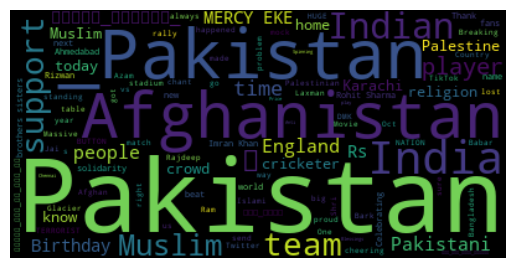

In [30]:
import matplotlib.pyplot as plt

consolidated = ' '.join(word for word in df['cleanedTweets'])

wordCloud = WordCloud(width=400, height=200, random_state=20, max_font_size=119).generate(consolidated)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [31]:
import seaborn as sns

In [32]:
df.groupby('segmentation').count()

,tweets,cleanedTweets,tPolarity,tSubjectivity
segmentation,,,,
negative,3,3,3,3
neutral,33,33,33,33
positive,21,21,21,21


<AxesSubplot: xlabel='tPolarity', ylabel='tSubjectivity'>

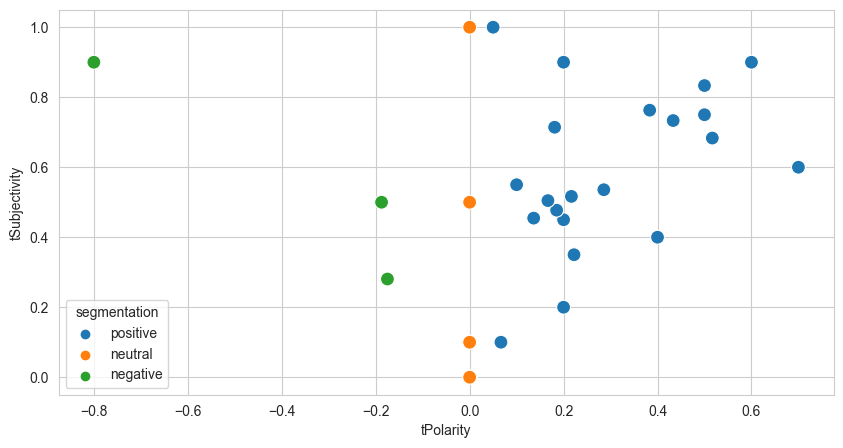

In [33]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.scatterplot(data=df, x='tPolarity',y='tSubjectivity',s=100,hue='segmentation')

<AxesSubplot: xlabel='segmentation', ylabel='count'>

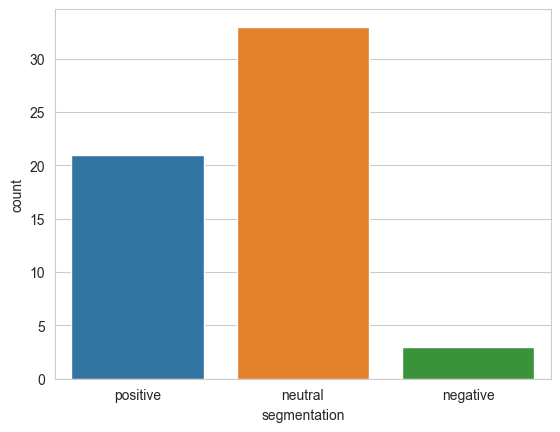

In [34]:
sns.countplot(data=df,x='segmentation')